## DATATHON HENRY 

###### Desarrollo: Alan Mysler

Librerias a utilizar: 

In [47]:
### Librerias
import pandas as pd
import numpy as np
import missingno as msno

### Data load (Lecutra del archivo "parquet")
import pyarrow.parquet as pq 

### Plott
import matplotlib.pyplot as plt
import seaborn as sns


Carga de dataset de entrenamiento:

In [48]:
train = pq.read_table(r'.\datasets\raw\train.parquet')

In [49]:
train = train.to_pandas()

Dimensiones y primer approach al contenido del dataset

In [50]:
train.shape

(346479, 22)

In [51]:
#Con fines practicos realizamos una particion para conocer las distintas columnas del DF
train.iloc[:,0:10].sample(10)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed
33244,7035095544,https://wichitafalls.craigslist.org/apa/d/wich...,wichita falls,https://wichitafalls.craigslist.org,1050,apartment,1300,2,2.0,1
333326,7047609879,https://bakersfield.craigslist.org/apa/d/baker...,bakersfield,https://bakersfield.craigslist.org,1205,apartment,1254,3,2.0,0
193107,7010219526,https://pennstate.craigslist.org/apa/d/state-c...,state college,https://pennstate.craigslist.org,897,apartment,400,0,1.0,0
119243,7048639848,https://houston.craigslist.org/apa/d/houston-w...,houston,https://houston.craigslist.org,925,apartment,1076,2,1.0,0
278010,7047072252,https://orlando.craigslist.org/apa/d/sanford-b...,orlando,https://orlando.craigslist.org,1140,apartment,908,2,2.0,1
76706,7036691135,https://honolulu.craigslist.org/oah/apa/d/hono...,hawaii,https://honolulu.craigslist.org,1525,apartment,550,2,1.0,1
308379,7040782703,https://chattanooga.craigslist.org/apa/d/chatt...,chattanooga,https://chattanooga.craigslist.org,1599,apartment,900,2,2.0,1
225418,7036514321,https://elpaso.craigslist.org/apa/d/el-paso-ca...,el paso,https://elpaso.craigslist.org,585,apartment,404,1,1.0,1
295698,7047378374,https://tucson.craigslist.org/apa/d/tucson-res...,tucson,https://tucson.craigslist.org,724,apartment,600,2,1.0,1
233128,7045447713,https://cincinnati.craigslist.org/apa/d/cincin...,cincinnati,https://cincinnati.craigslist.org,875,apartment,749,1,1.0,1


In [52]:
train.iloc[:,10:17].sample(10)

,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options
260525,1,1,0,0,1,w/d hookups,None
35043,1,0,0,1,0,w/d in unit,carport
8865,1,1,0,0,0,w/d in unit,off-street parking
330272,1,1,0,0,0,w/d in unit,off-street parking
185719,1,0,0,0,0,w/d hookups,off-street parking
193798,1,1,0,0,0,laundry on site,street parking
143150,1,1,1,0,0,w/d hookups,detached garage
120254,0,1,0,0,0,None,None
181094,1,1,0,0,0,w/d in unit,off-street parking
169998,1,1,0,0,0,None,detached garage


In [53]:
train.iloc[:,17:23].sample(10)

,image_url,description,lat,long,state
6258,https://images.craigslist.org/00E0E_g6ZLEsvfcj...,Welcome to apartment living at its best! Let o...,34.0966,-84.5807,ga
79062,https://images.craigslist.org/00u0u_4zW9BprJfj...,Bedrooms: 1 Bathrooms: 1 Price: $730 Discover...,30.1175,-94.1903,tx
243276,https://images.craigslist.org/00Q0Q_8pBpayFMOn...,**Come in today for a tour of our Property! We...,36.0920,-80.3224,nc
231237,https://images.craigslist.org/00n0n_2HidLqxDC9...,Redstone Apartments 1301 Barthelow Dr. College...,30.6045,-96.3123,tx
84620,https://images.craigslist.org/00g0g_dP95KTZaKA...,Studios @ 270 - $935.00 per month270 Laurel S...,41.7669,-72.6969,ct
49059,https://images.craigslist.org/00l0l_4Dp08z92TE...,LOOK AND LEASE TODAY!!!$199 TO APPLY!!! If yo...,29.8016,-95.4467,tx
97060,https://images.craigslist.org/00J0J_kcfRfnGEpP...,Coventry Town Homes2323 South 800 WestWood Cro...,40.8874,-111.9030,ut
66980,https://images.craigslist.org/00Z0Z_9a26wi7mUB...,Fairways at Lake Mary is a luxury living commu...,28.7770,-81.3472,fl
7414,https://images.craigslist.org/00L0L_jBUpT1R7A2...,Lakeland EastRENT: $1019 / MONTH SIZE: 989 sq ...,32.3331,-90.0970,ms
108174,https://images.craigslist.org/00Q0Q_g0fKbAEzct...,"This spacious one bedroom, one bathroom apartm...",43.6208,-116.1960,id


Observamos el tipo de dato de cada columna

In [54]:
train.iloc[:,0:12].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               346479 non-null  int64  
 1   url              346479 non-null  object 
 2   region           346479 non-null  object 
 3   region_url       346479 non-null  object 
 4   price            346479 non-null  int64  
 5   type             346479 non-null  object 
 6   sqfeet           346479 non-null  int64  
 7   beds             346479 non-null  int64  
 8   baths            346479 non-null  float64
 9   cats_allowed     346479 non-null  int64  
 10  dogs_allowed     346479 non-null  int64  
 11  smoking_allowed  346479 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 31.7+ MB


In [55]:
train.iloc[:,12:23].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   wheelchair_access        346479 non-null  int64  
 1   electric_vehicle_charge  346479 non-null  int64  
 2   comes_furnished          346479 non-null  int64  
 3   laundry_options          275308 non-null  object 
 4   parking_options          219797 non-null  object 
 5   image_url                346479 non-null  object 
 6   description              346477 non-null  object 
 7   lat                      344757 non-null  float64
 8   long                     344757 non-null  float64
 9   state                    346479 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 26.4+ MB


In [56]:
#Creacion de la columna "category_price" con la categoria correspondiente
train["category_price"] = 0

# Discretizacion/binning de la columma "price" con dos rangos indicados (Rango 1: low: <=999 / Rango 2: > 1000)
train.loc[train["price"] <= 999, "category_price"] = 1
train.loc[(train["price"] > 999), "category_price"] = 0

In [57]:
train["category_price"].unique()

array([0, 1], dtype=int64)

In [58]:
#Por ultimo dropeamos la columna "price" ya que no era utilizada posteriormente:
train.drop(columns=["price"], inplace=True)

------------------------------------------

**DUPLICADOS:**

In [59]:
#Filas duplicadas:
train.duplicated().sum()

0

No existen filas enteras duplicadas

In [60]:
#Buscamos anuncion que se repitan a traves de su descripción ya que el resto de las columnas no nos permiten hacer esta distinción: 
train.duplicated("description").sum()

91488

Pareciera haber *91488 filas* donde la descripcion del anuncio se repiten, probablemente en relacion a un mismo inmueble.

Confirmamos si los mismos son efectivamente duplicados:

In [61]:
df = train.loc[train['description'].duplicated(keep=False),'description']
df
df = df.groupby(df).apply(lambda x: tuple(x.index)).tolist()
df[0]

(85688, 136676, 138914, 174442, 278237)

In [62]:
train.loc[[278237,174442],['lat','description']]

,lat,description
278237,35.7667,"!! LÃ¢rge 3 bedroom Home ~ WASHER/DRYER, STEEL..."
174442,35.8673,"!! LÃ¢rge 3 bedroom Home ~ WASHER/DRYER, STEEL..."


Efectivamente, son duplicados. Procedemos a eliminar los mismos: 

In [63]:
train.shape

(346479, 22)

In [64]:
train.drop_duplicates(subset='description', inplace=True)

In [65]:
train.shape

(254991, 22)

------

Ahora conocemos en porfunidad las columnas con el metodo *describe()*

In [66]:
train.describe(exclude=[object])

,id,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,category_price
count,2.549910e+05,2.549910e+05,254991.000000,254991.000000,254991.000000,254991.000000,254991.000000,254991.000000,254991.000000,254991.000000,253704.000000,253704.000000,254991.000000
mean,7.041000e+09,1.108429e+03,1.932758,1.500467,0.688381,0.669733,0.724994,0.077191,0.013459,0.046041,37.402306,-92.804566,0.413877
std,8.983170e+06,2.352589e+04,3.653762,0.627858,0.463156,0.470310,0.446518,0.266895,0.115231,0.209574,5.724401,17.273246,0.492528
min,7.003808e+09,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000,0.000000
25%,7.035951e+09,7.550000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.480500,-102.124000,0.000000
50%,7.043421e+09,9.520000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,38.037100,-87.836100,0.000000
75%,7.048540e+09,1.167000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.396050,-80.889200,1.000000
max,7.051292e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000,1.000000


In [67]:
train.describe(exclude=[np.number])

,url,region,region_url,type,laundry_options,parking_options,image_url,description,state
count,254991,254991,254991,254991,193791,153125,254991,254990,254991
unique,254991,404,413,12,5,7,149363,254990,51
top,https://boise.craigslist.org/apa/d/very-nice-b...,rochester,https://saltlakecity.craigslist.org,apartment,w/d in unit,off-street parking,https://images.craigslist.org/00o0o_g5ogc305Nw...,Super cute row house in the Boise bench area. ...,ca
freq,1,2732,2345,206490,89679,76855,155,1,23257


- Columna "category_price" no entra en juego ya que son el objetivo
- Columnas tipo 1 (apriori no deberian tener impacto en el precio del inmueble): id, url, region_url, image_url
- Columnas tipo 2 (pueden tenre un impacto +/- segun el punto de vista): cats_allowed, dos_allowed, wheelchair_access, electric_vehicle_charge
- Columnas tipo 3 (creeriamos tiene alto impacto en el valor): sqfeet, beds, baths, comes_furnished, lat, long, region, type, laundry_options, parking_options, description, state

-------------

### VALORES FALTANTES

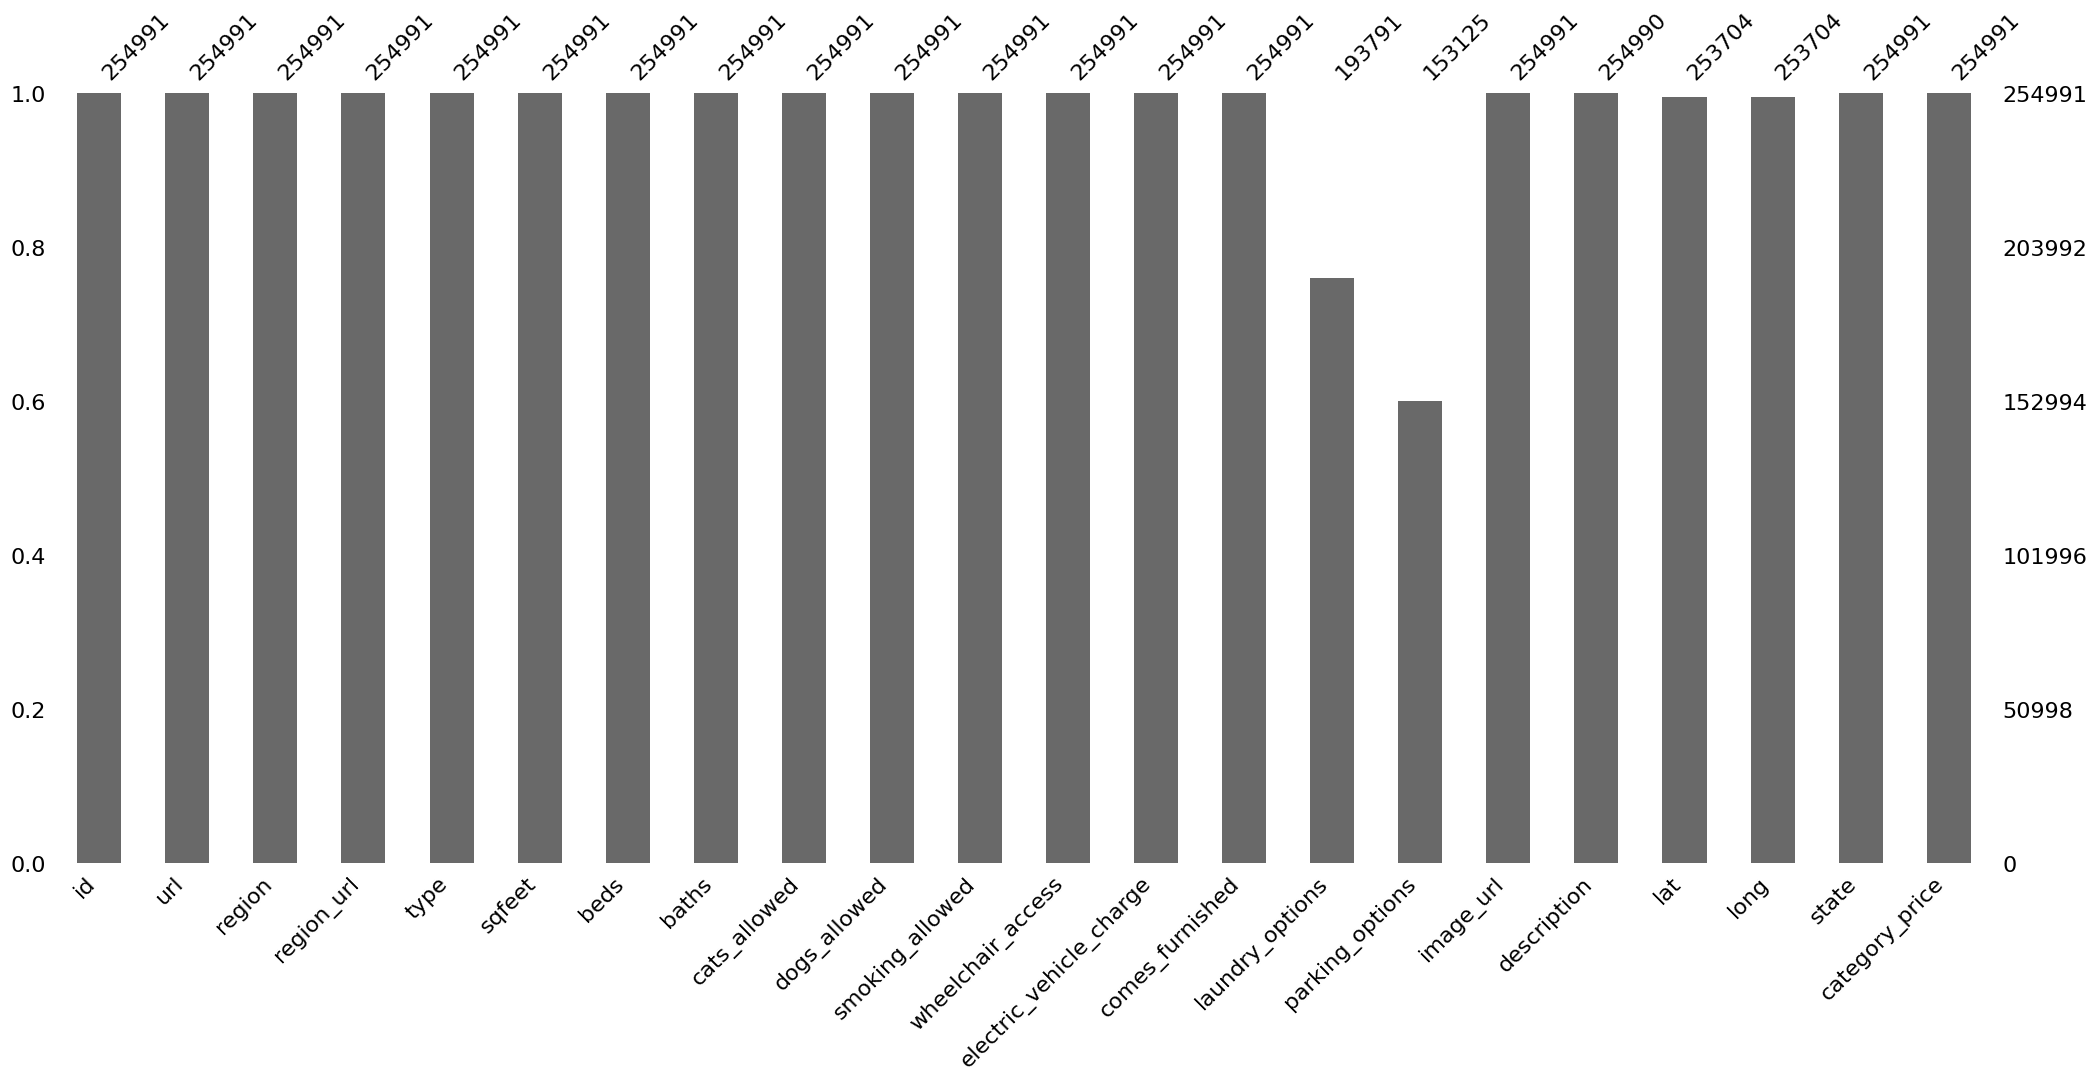

In [70]:
#Analizamos graficamente los datos faltantes:
msno.bar(train)
plt.show()

In [71]:
#Cantidad de datos faltantes segun cada variable
train.isna().sum().sort_values()

id                              0
image_url                       0
comes_furnished                 0
electric_vehicle_charge         0
wheelchair_access               0
state                           0
dogs_allowed                    0
cats_allowed                    0
smoking_allowed                 0
beds                            0
sqfeet                          0
type                            0
region_url                      0
region                          0
url                             0
baths                           0
category_price                  0
description                     1
lat                          1287
long                         1287
laundry_options             61200
parking_options            101866
dtype: int64

Las columnas que cuentan con valores faltantes son "laundry_option""parking_option", "lat", "long y "description"

**COLUMNA LAUNDRY_OPTIONS**

In [72]:
#Porcentaje de valores faltantes de la variable laundry:
(train.laundry_options.isnull().sum()/len(train))*100


24.00084708872078

24% es considerable, por lo tanto analizamos la posibilidad de trabajar con las categorias dentro de laundry_options

In [73]:
#Valores que toma la variable:
train.laundry_options.value_counts()

w/d in unit           89679
w/d hookups           46447
laundry on site       32607
laundry in bldg       22405
no laundry on site     2653
Name: laundry_options, dtype: int64

Considerando que casi el 50% de los datos indican "w/d in unit" (lavasecaplatos dentro de la unidad) decidimos arbitrariamente separar la columna laundry_options en 3.
- Aquellos con w/d in unit valdran 1
- Aquellos que tengan la posibilidad de conexion (w/d hookups), pero no el dispositivo lavasecaplatos valdra 2
- El resto valdra 3 (aprovechamos y llenamos los nulos con valor = 3)

In [74]:
train.replace({'laundry_options' : { 'w/d in unit' : 1, 'w/d hookups' : 2,  "no laundry on site" : 3 , "laundry on site" : 3, "laundry in bldg" : 3 }}, inplace=True)
train["laundry_options"].fillna(3, inplace = True)

In [75]:
train.laundry_options.value_counts()

3.0    118865
1.0     89679
2.0     46447
Name: laundry_options, dtype: int64

**COLUMNA PARKING_OPTIONS**

In [76]:
#Porcentaje de valores faltantes de la variable parking:
((train.parking_options.isnull().sum()/len(train))*100)


39.948860940190045

40% es considerable, por lo tanto analizamos la posibilidad de trabajar con las categorias dentro

In [77]:
#Valores que toma la variable:
train.parking_options.value_counts()

off-street parking    76855
attached garage       28497
carport               23153
detached garage       12567
street parking        10800
no parking             1118
valet parking           135
Name: parking_options, dtype: int64

La presencia de un garage propio ("attached garage", "carport", "detached garage", "valet parking") suele ser un determinante a la hora de hablar de inmuebles. Se decide dividir la columna "parking_options" en 3 posibilidades:
- 1: cuenta con garage propio ("attached garage", "carport", "detached garage", "valet parking")
- 2: garage comunitario ("off-street parking")
- 3: sin garage ("street parking", "no parking") 
  
- El resto de los valores nulos seran categorizados como  3 ya que ante la no indicacion de la presencia de garage, se presupone la posibilidad de estacionar en la calle ("street parking")

In [78]:
train.replace({'parking_options' : { "attached garage" : 1, "carport" : 1, "detached garage" : 1, "valet parking" : 1}}, inplace=True)
train.replace({'parking_options' : { "off-street parking" : 2}}, inplace=True)
train.replace({'parking_options' : { "street parking" : 3, "no parking" : 3}}, inplace=True)
train["parking_options"].fillna(3, inplace = True)

**COLUMNA "DESCRIPTION"**

Cuenta con un solo registro faltante. Dado la corta experiencia en ingenieria de datos y ML, se decide no utilizar esta columna. Se procede a eliminar la misma

In [79]:
train.drop(columns=["description"], inplace = True)

**COLUMNA "LAT" Y "LONG"**

En relacion a las columnas de geolocalizacion, se decide por comodidad de trabajo conservar unicamente la columna "state". Decidimos (conociendo la perdida de informacion que esto implica, pero a fines de desarrollar un primer modelo) eliminar las columnas: 

"lat", "long", "id", "url", "region", "region_url", "image_url"

In [80]:
train.drop(columns=["lat", "long", "id", "url", "region", "region_url", "image_url"], inplace=True)

In [81]:
#Vemos como viene quedando el dataframe hasta este punto
train.head()

,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state,category_price
0,house,1200,2,2.0,1,1,1,0,0,0,1.0,1.0,id,0
1,apartment,694,1,1.0,1,1,1,0,0,0,1.0,1.0,co,0
2,apartment,900,2,2.0,0,0,1,0,0,0,2.0,2.0,va,0
3,house,1469,3,2.0,1,1,1,0,0,0,1.0,3.0,az,0
4,apartment,700,1,1.0,1,1,1,0,0,0,1.0,1.0,tn,1


----

Trabajamos con las columnas que tenemos hasta aqui:

**COLUMNA "TYPE"**

In [82]:
train["type"].value_counts()

apartment          206490
house               25006
townhouse           10370
condo                4913
duplex               3811
manufactured         2606
cottage/cabin         723
loft                  490
flat                  425
in-law                147
land                    8
assisted living         2
Name: type, dtype: int64

Algunos detalles a tener en cuenta para la categorización:
- 1: apartment, flat (vivencia en estructura en comun?)
- 2: house, townhouse, condo, duplex, manufactured, cottage/cabin, loft, land (Estructura edilicia separada?)
- 3: in-law, assited living (convivencia con terceros en espacio pequeño)

In [83]:
train.replace({'type' : { "apartment" : 1, "flat" : 1}}, inplace=True)
train.replace({'type' : { "house" : 2, "townhouse" : 2, "condo" : 2, "duplex" : 2, "manufactured" : 2, "cottage/cabin" : 2, "loft" : 2,"land" : 2}}, inplace=True)
train.replace({'type' : { "in-law" : 3, "assisted living" : 3}}, inplace=True)

**COLUMNAS "DOGS_ALLOWED" Y "CATS_ALLOWED"**

Consierando que es extraño encontrar un espacio donde se permita exlusivamente perro o gato, decidimos unificar esta columna para reducir la dimensionalidad del dataset. 

Creamos la columna "animals_allowed" y luego dropeamos cats_allowed y dogs_allowed

In [84]:
train.head()

,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state,category_price
0,2,1200,2,2.0,1,1,1,0,0,0,1.0,1.0,id,0
1,1,694,1,1.0,1,1,1,0,0,0,1.0,1.0,co,0
2,1,900,2,2.0,0,0,1,0,0,0,2.0,2.0,va,0
3,2,1469,3,2.0,1,1,1,0,0,0,1.0,3.0,az,0
4,1,700,1,1.0,1,1,1,0,0,0,1.0,1.0,tn,1


In [85]:
train["animals_allowed"] = train["cats_allowed"] + train["dogs_allowed"]
train.replace({'animals_allowed' : { 2 : 1}}, inplace=True)
train.drop(columns=["cats_allowed", "dogs_allowed"], inplace=True)

**COLUMNA "STATE"**

Utilizamos label_encoder para discretizar

In [86]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train['state'] = label_encoder.fit_transform(train['state'])

--------

**ALGUNAS VISUALIZACIONES:**

In [87]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

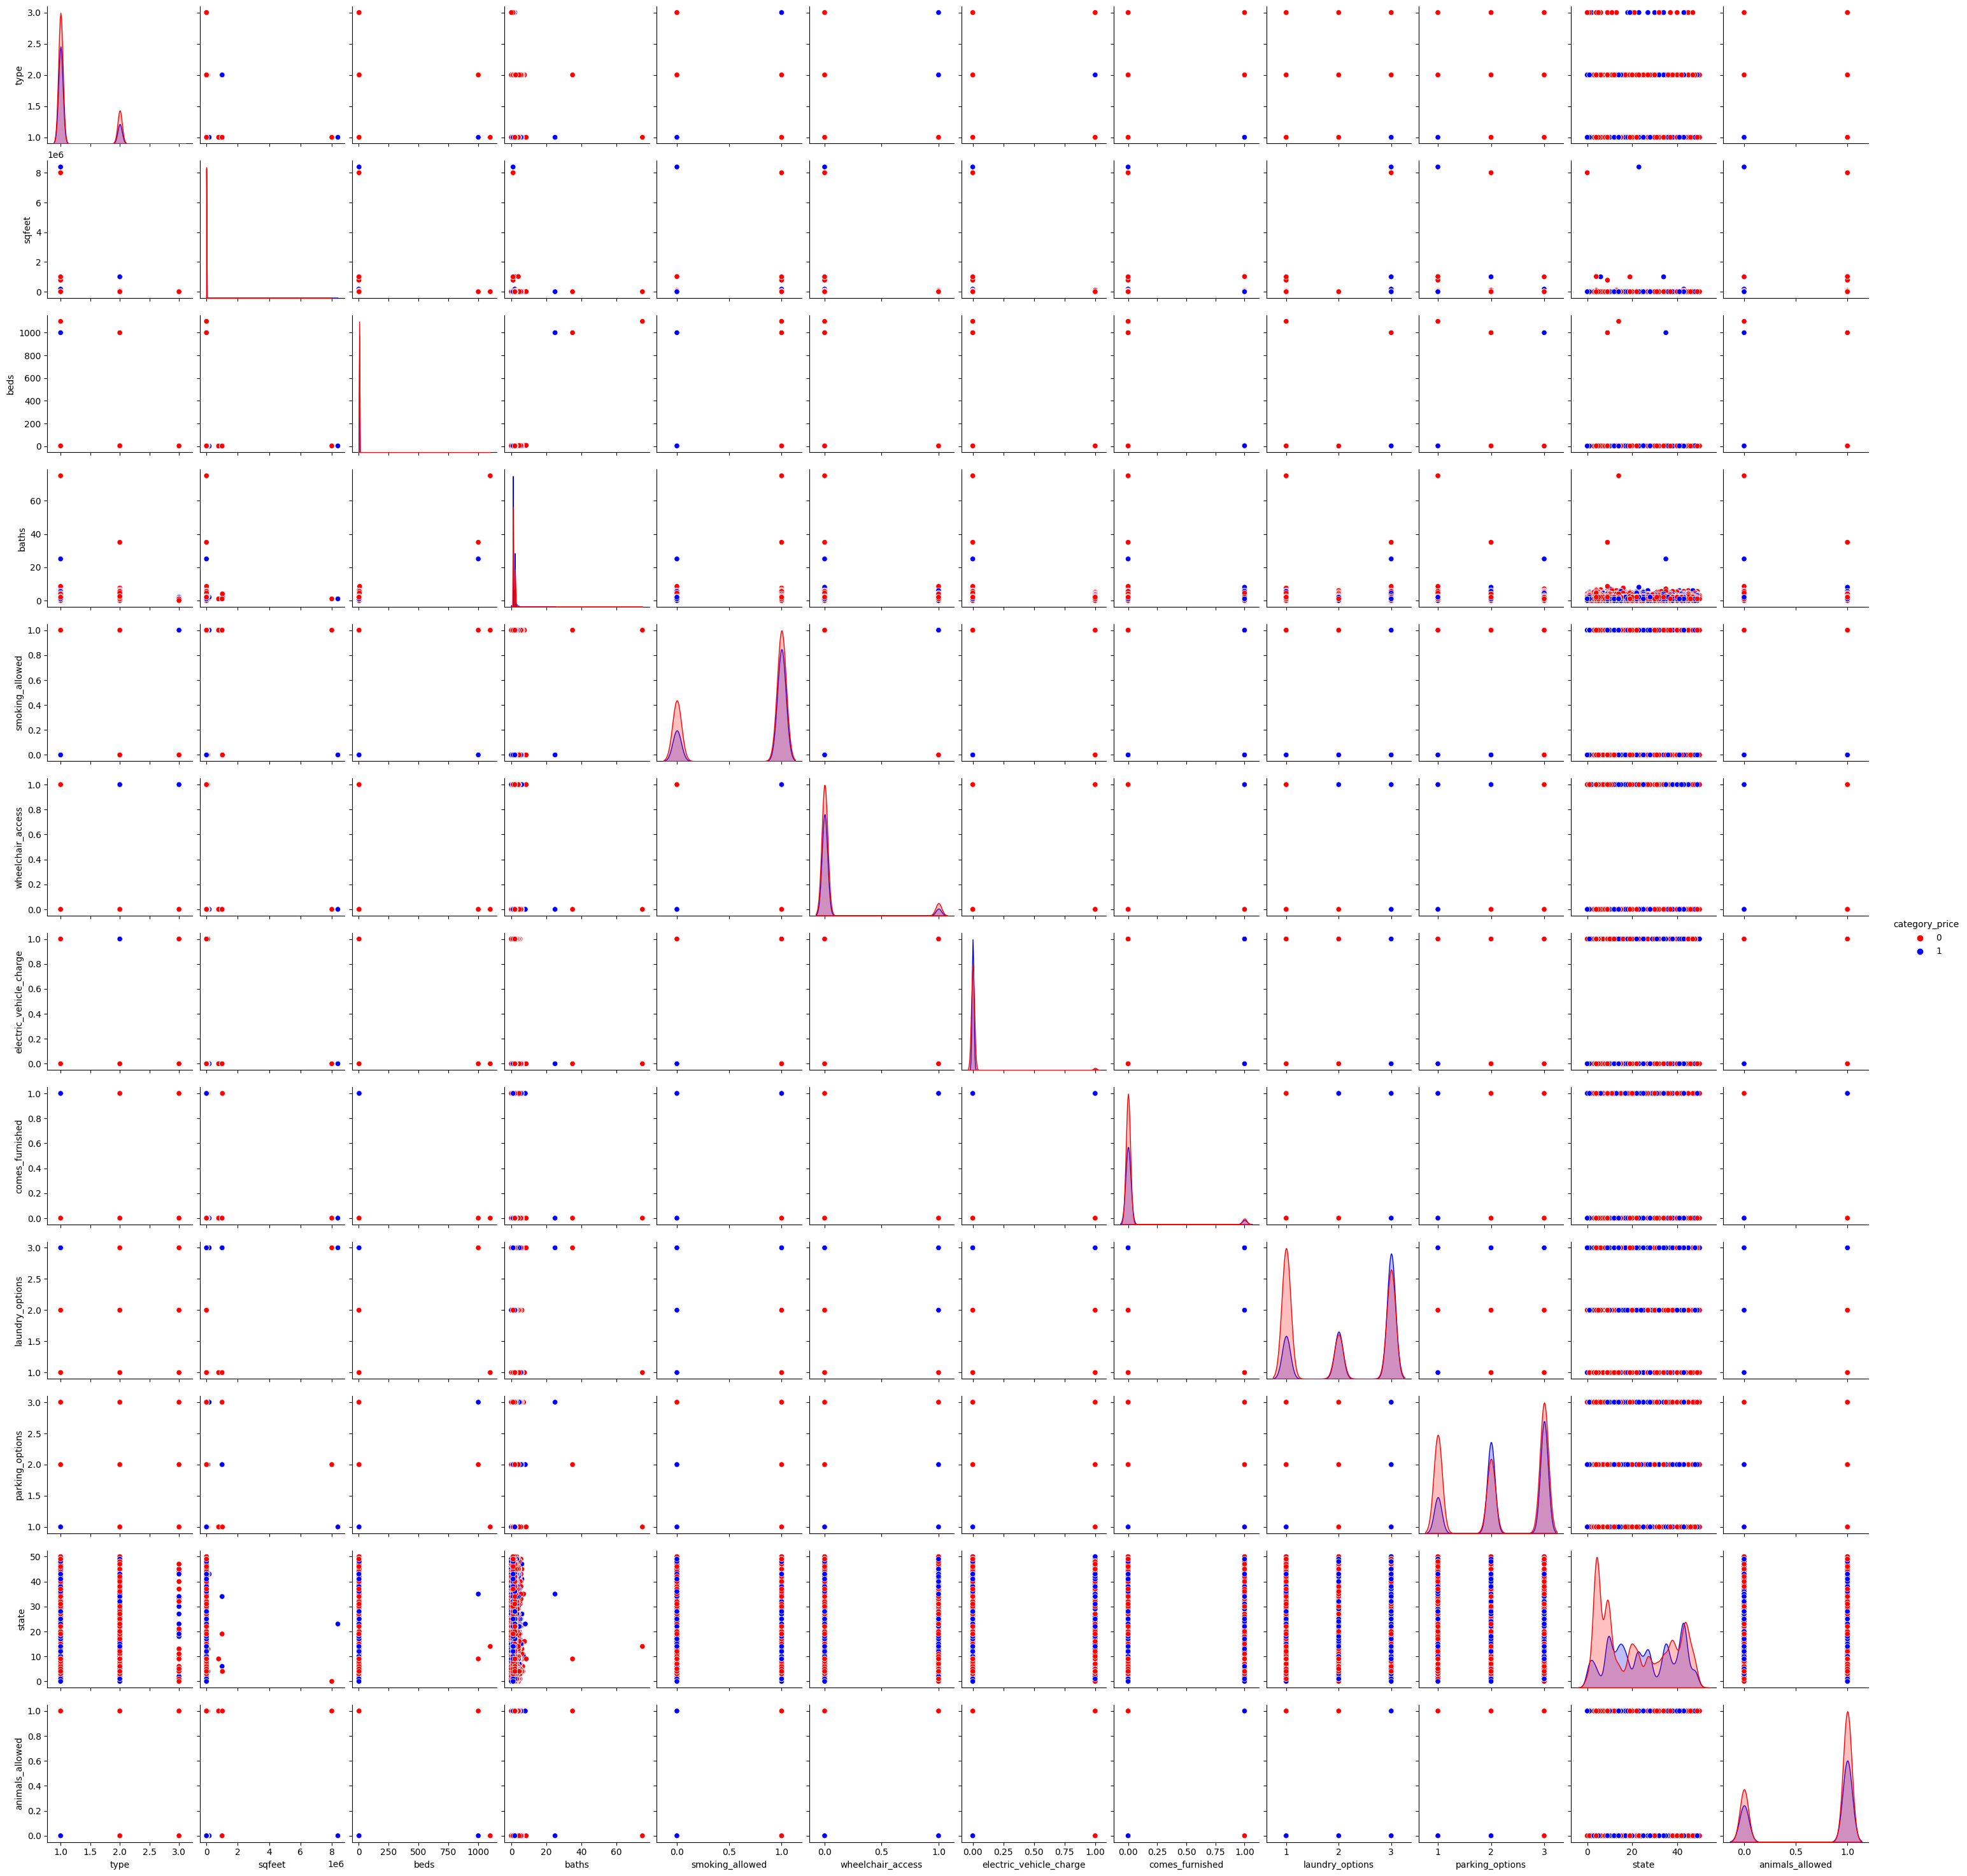

In [107]:
sns.pairplot(train, hue="category_price", palette = ['r', 'b'])
plt.show()

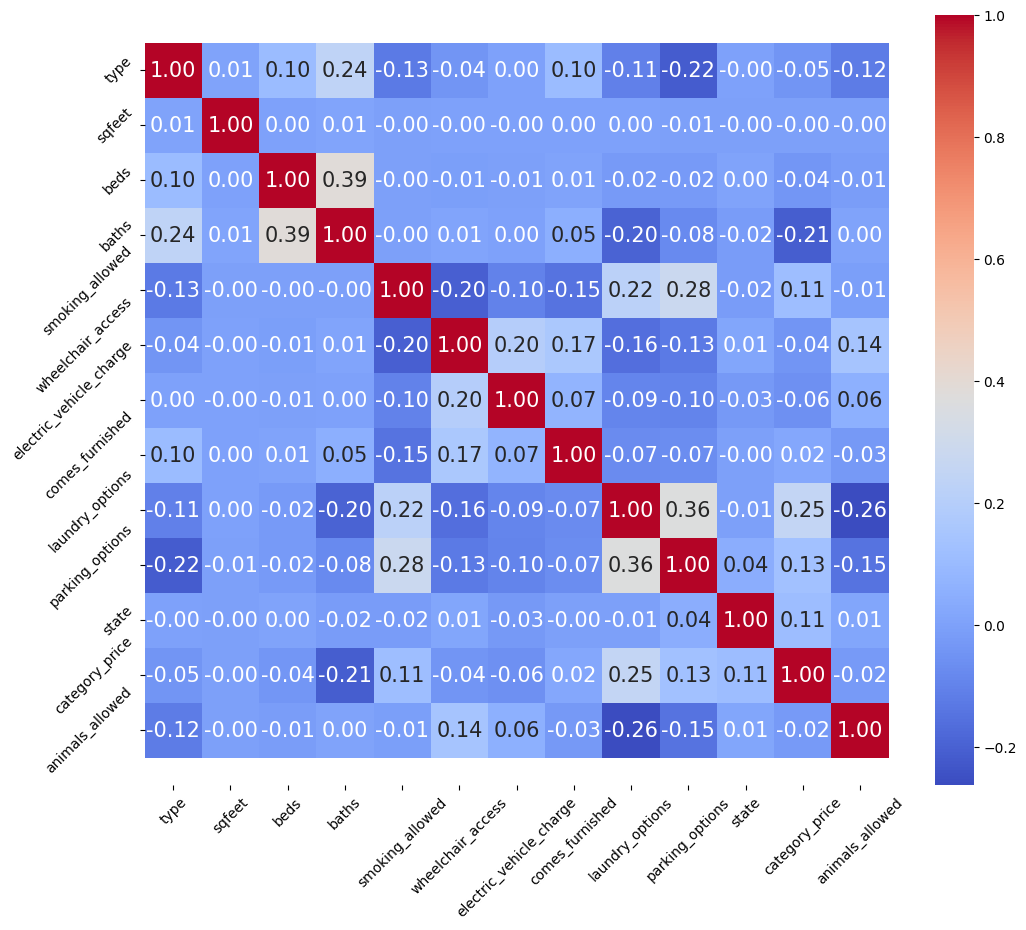

In [90]:
corr = train.corr()
plot_corre_heatmap(corr)

--------

**MODELO SUPREVISADO:**

In [91]:
#Importo librerias necesarias
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from IPython.display import clear_output

#instancio el modelo de arbol de decisión
tree = DecisionTreeClassifier(max_depth = 15, random_state = 42) 


In [92]:
#Gener la división del dataset en train y test utilizando train_test_split:
#Cargo en la variable X las features a tuilizar:
X = train.drop(columns= ["category_price"], axis=1)
#Cargo en la variable Y el target:
y = train['category_price']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.20, random_state=42) 

In [93]:
# Entreno el modelo:

tree.fit(X.values,y.values)

DecisionTreeClassifier(max_depth=15, random_state=42)

In [94]:
#Parametros del modelo
print(f' Clases: {tree.classes_}')
print(f' Cantidad de clases: {tree.n_classes_}')
print(f' Features utilizadas: {tree.max_features_}')
print(f' Peso de cada una de las features: {tree.feature_importances_}')

# Realizamos la predicccion:
y_pred = tree.predict(X.values)

#Observamos el "accuracy":
print(f"Acurracy: {accuracy_score(y,y_pred)}")
#print(recall_score(y,y_pred))

 Clases: [0 1]
 Cantidad de clases: 2
 Features utilizadas: 12
 Peso de cada una de las features: [0.01826781 0.3156879  0.03804049 0.04690032 0.02234164 0.00771251
 0.00127756 0.01259918 0.10801432 0.0322319  0.37597738 0.02094898]
Acurracy: 0.8800467467479245


In [95]:
test = pq.read_table(r'.\datasets\raw\test.parquet')

In [96]:
test = test.to_pandas()

In [97]:
#Columna laundry_options
test.replace({'laundry_options' : { 'w/d in unit' : 1, 'w/d hookups' : 2,  "no laundry on site" : 3 , "laundry on site" : 3, "laundry in bldg" : 3 }}, inplace=True)
test["laundry_options"].fillna(3, inplace = True)

#Columna parking_options
test.replace({'parking_options' : { "attached garage" : 1, "carport" : 1, "detached garage" : 1, "valet parking" : 1}}, inplace=True)
test.replace({'parking_options' : { "off-street parking" : 2}}, inplace=True)
test.replace({'parking_options' : { "street parking" : 3, "no parking" : 3}}, inplace=True)
test["parking_options"].fillna(3, inplace = True)

#Borrado de columnas sin utilizar:
test.drop(columns=["description"], inplace = True)
test.drop(columns=["lat", "long", "id", "url", "region", "region_url", "image_url"], inplace=True)

#Columna "type":
test.replace({'type' : { "apartment" : 1, "flat" : 1}}, inplace=True)
test.replace({'type' : { "house" : 2, "townhouse" : 2, "condo" : 2, "duplex" : 2, "manufactured" : 2, "cottage/cabin" : 2, "loft" : 2,"land" : 2}}, inplace=True)
test.replace({'type' : { "in-law" : 3, "assisted living" : 3}}, inplace=True)

#Columnas "dogs_allowed" y "cats_allowed" + creacion de "animals_allowed"
test["animals_allowed"] = test["cats_allowed"] + test["dogs_allowed"]
test.replace({'animals_allowed' : { 2 : 1}}, inplace=True)
test.drop(columns=["cats_allowed", "dogs_allowed"], inplace=True)

#Columna "State"
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
test['state'] = label_encoder.fit_transform(test['state'])

In [101]:
#Generamos las predicciones del archivo "test"
X=test
y_final=tree.predict(X.values)

In [102]:
#Creamos el dataframe con la prediccion y la columna ["pred"]
prediction  = pd.DataFrame(y_final, columns=['pred'])

In [104]:
prediction

,pred
0,0
1,0
2,0
3,0
4,0
...,...
38493,0
38494,1
38495,0
38496,0


In [105]:
#Guardo archivo CSV y sin index tal cual fuera solicitado
prediction.to_csv('amysler.csv', index=False)